In [76]:
import pandas as pd

def convert_ms_to_int(e):
    return int(e[:-2])

data = pd.read_csv("cleaned_data.csv")
data = data[data["throttleType"] == "delay"]

In [82]:
delay_data = data[['throttleparameter', 'speed-index_numericValue', 'speed-index_score', 'lighthouse_performance', 'httpVersion']]
delay_data['throttleparameter'] = delay_data['throttleparameter'].apply(convert_ms_to_int)
delay_data.sort_values(by=['throttleparameter'], inplace=True)

delay_data

/tmp/ipykernel_24629/2652502024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_data['throttleparameter'] = delay_data['throttleparameter'].apply(convert_ms_to_int)
/home/linuxbrew/.linuxbrew/Cellar/python@3.9/3.9.2_5/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,throttleparameter,speed-index_numericValue,speed-index_score,lighthouse_performance,httpVersion
272,0,5185.839000,0.61,0.38,3
273,0,2676.355000,0.97,0.75,3
271,0,3861.406000,0.83,0.78,3
150,0,2628.893000,0.97,0.80,2
183,0,2513.652000,0.98,0.84,3
...,...,...,...,...,...
149,1000,6839.362166,0.35,0.41,2
180,1000,2626.462000,0.97,0.83,3
257,1000,5115.887000,0.62,0.42,3
201,1000,3833.955000,0.84,0.79,2


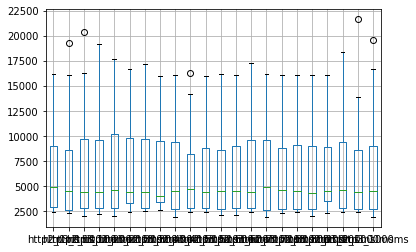

In [64]:
#Ignore this useless cell, thanks
#Seaborn is superior to matplotlib

def boxplot(field, data):
    selected = {}

    for i in range(0, 1100, 100):
        parameter = str(i) + "ms"

        http2_data = data[(data['throttleparameter'] == parameter) & (data['httpVersion'] == 2)][field]
        http3_data = data[(data['throttleparameter'] == parameter) & (data['httpVersion'] == 3)][field]
        selected['http2_' + parameter] = http2_data
        selected['http3_' + parameter] = http3_data

    boxplot_df = pd.DataFrame(selected)
    boxplot_df.boxplot()

boxplot('speed-index_numericValue', data)

<AxesSubplot:xlabel='throttleparameter', ylabel='speed-index_numericValue'>

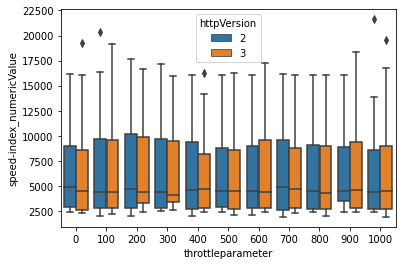

In [83]:
import seaborn as sns

sns.boxplot(x="throttleparameter", y="speed-index_numericValue", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='speed-index_score'>

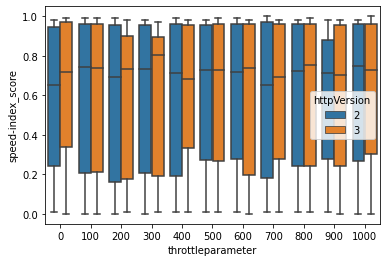

In [84]:
sns.boxplot(x="throttleparameter", y="speed-index_score", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='lighthouse_performance'>

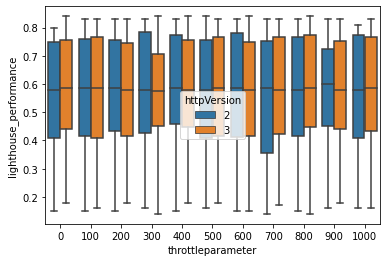

In [85]:
sns.boxplot(x="throttleparameter", y="lighthouse_performance", hue="httpVersion", data=delay_data)